In [1]:
import matplotlib.pyplot as plt
from utils import data_utils, train_utils
%matplotlib inline
import cv2
import numpy as np
from matplotlib import cm
from PIL import Image
from descartes.patch import PolygonPatch
from shapely import wkt
from shapely import affinity
import matplotlib

In [2]:
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

# Test training input

In [4]:
train_input = train_utils.input_data(class_id=0, crop_size=144, crop_per_img=1, rotation=360, verbose=True, train=True)

In [6]:
img, label = train_inputd.next()

Loading training data: [                        ] 0%


utils/data_utils.py:786: RuntimeWarning: divide by zero encountered in divide
  (nir - image_r) / (nir + C1 * image_r - C2 * image_b + L))


Loading training data: [=                       ] 4%
Loading training data: [==                      ] 8%
Loading training data: [===                     ] 12%
Loading training data: [====                    ] 16%
Loading training data: [=====                   ] 20%
Loading training data: [======                  ] 25%


utils/data_utils.py:786: RuntimeWarning: invalid value encountered in divide
  (nir - image_r) / (nir + C1 * image_r - C2 * image_b + L))


Loading training data: [=======                 ] 29%
Loading training data: [========                ] 33%
Loading training data: [=========               ] 37%
Loading training data: [==========              ] 41%
Loading training data: [===========             ] 45%
Loading training data: [============            ] 50%
Loading training data: [=============           ] 54%
Loading training data: [==============          ] 58%
Loading training data: [===============         ] 62%
Loading training data: [================        ] 66%
Loading training data: [=================       ] 70%
Loading training data: [==================      ] 75%
Loading training data: [===================     ] 79%
Loading training data: [====================    ] 83%
Loading training data: [=====================   ] 87%
Loading training data: [======================  ] 91%
Loading training data: [======================= ] 95%
Loading training data: [========================] 100%

Labels are valid.
Image fe

In [8]:
print img.shape, label.shape

(25, 144, 144, 16) (25, 144, 144)


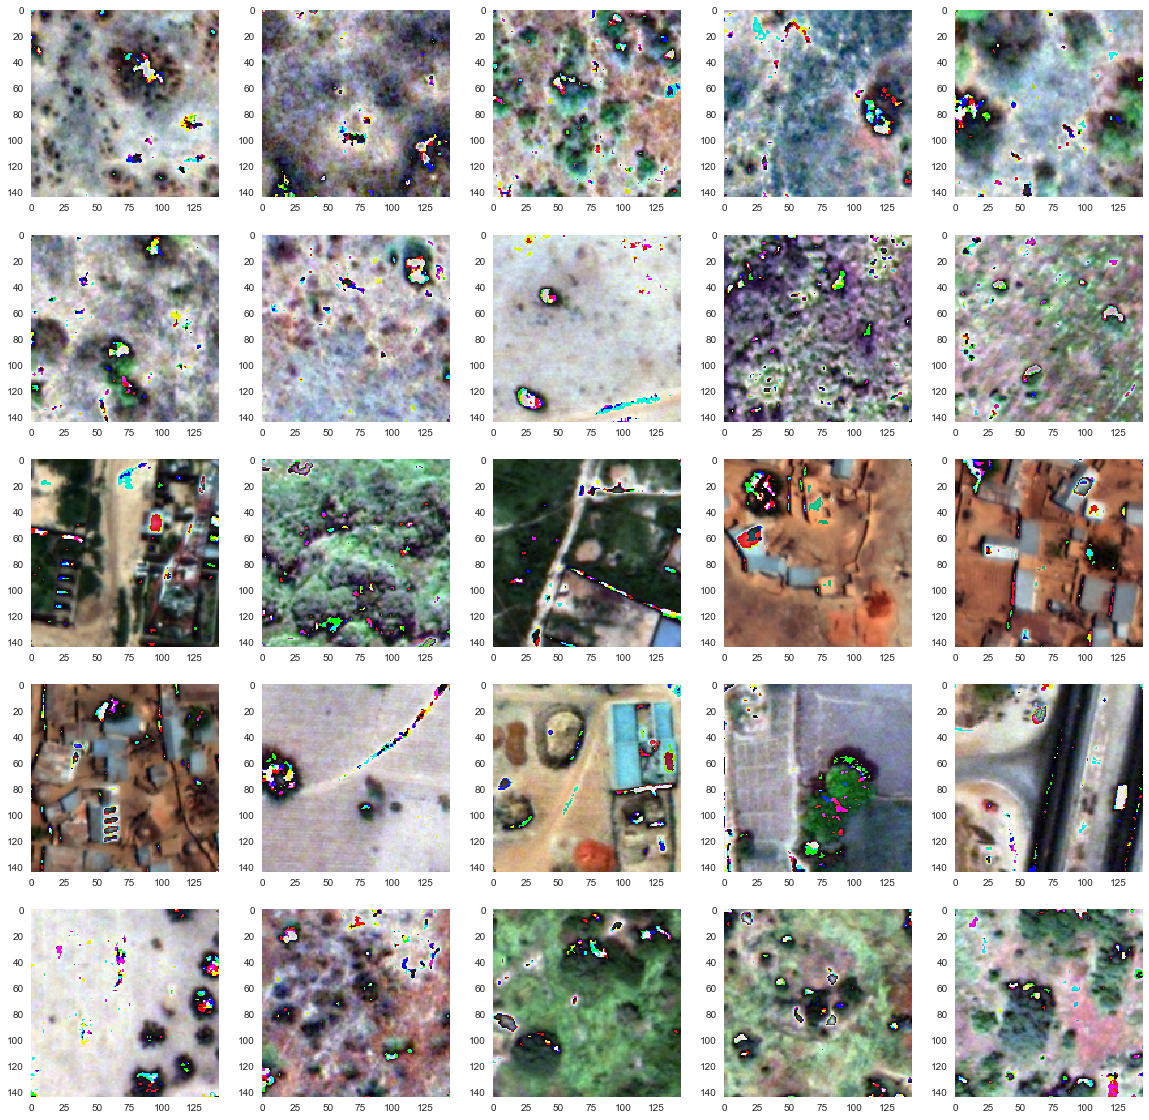

In [10]:
ind = 0
fig, axs = plt.subplots(5,5, figsize=[20,20])
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(data_utils.scale_percentile(img[ind, :,:,9:12]))
        ind = ind+1

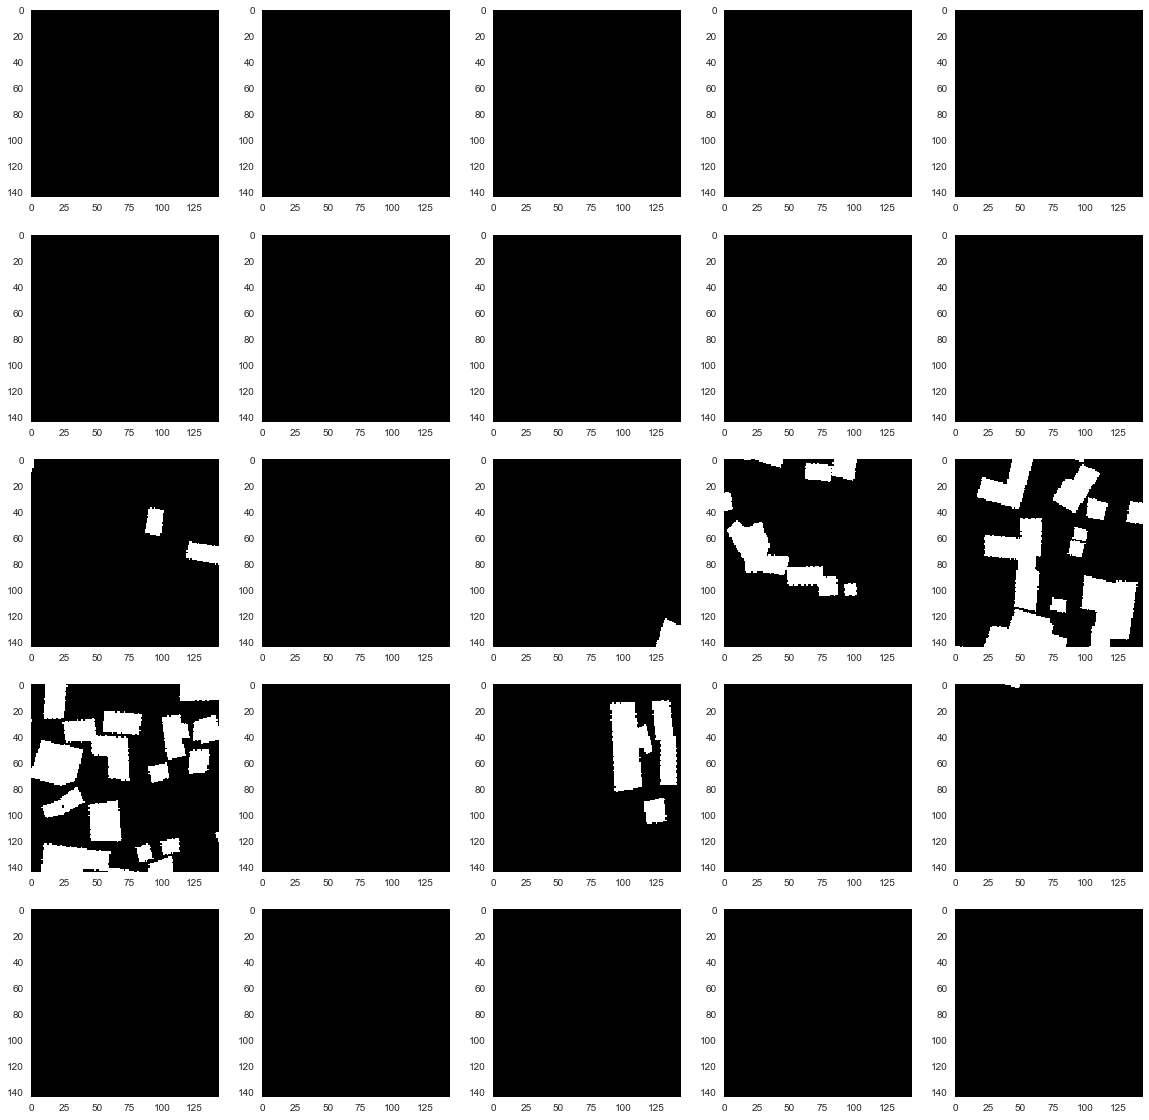

In [11]:
ind = 0
fig, axs = plt.subplots(5,5, figsize=[20,20])
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(label[ind, :, :], cmap=plt.cm.gray)
        ind = ind+1

# Classes

In [7]:
data_utils.CLASSES

{1: 'Bldg',
 2: 'Struct',
 3: 'Road',
 4: 'Track',
 5: 'Trees',
 6: 'Crops',
 7: 'Fast H2O',
 8: 'Slow H2O',
 9: 'Truck',
 10: 'Car'}

In [12]:
img_data = data_utils.ImageData(17)

In [14]:
img_data.load_image()
img_data.create_label()
img_data.create_train_feature()

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(im0.label[:500,:500,0], cmap=plt.cm.gray)

In [ ]:
angle = 70.
radian = np.pi * angle / 180.
dim = 500.
dim_extra = int(np.ceil(dim * (np.sin(radian) + np.cos(radian) - 1) / 2.))

In [ ]:
rot_mat = cv2.getRotationMatrix2D((dim / 2. + dim_extra, dim / 2. + dim_extra), angle, 1.)

In [ ]:
base = 1000
dim = int(dim)
im = im0.three_band_image[base:base+dim,base:base+dim,:]
label = im0.label[base:base+dim,base:base+dim,0]
im_orig = im0.three_band_image[base-dim_extra:base+dim+dim_extra,base-dim_extra:base+dim+dim_extra,:]
label_orig = im0.label[base-dim_extra:base+dim+dim_extra,base-dim_extra:base+dim+dim_extra,0]

In [ ]:
base, dim, dim_extra

In [ ]:
fig, axs = plt.subplots(2,2, figsize=[20,20])
axs[1,1].imshow(scale_percentile(im))
axs[0,1].imshow(scale_percentile(im))
axs[0,1].imshow(label, alpha=0.4)
axs[1,0].imshow(scale_percentile(im_final))
axs[0,0].imshow(scale_percentile(im_final))
axs[0,0].imshow(label_final, alpha=0.3)

In [ ]:
im_new = cv2.warpAffine(im_orig, rot_mat, (dim+2*dim_extra, dim+2*dim_extra))
label_new = cv2.warpAffine(label_orig, rot_mat, (dim+2*dim_extra, dim+2*dim_extra))

In [ ]:
plt.figure(figsize=[5,5])
plt.imshow(scale_percentile(im_new[:,:,:]))

In [ ]:
im_final = im_new[dim_extra:dim+dim_extra, dim_extra:dim+dim_extra, :]
label_final = label_new[dim_extra:dim+dim_extra, dim_extra:dim+dim_extra]

In [ ]:
fig, axs = plt.subplots(1,2, figsize=[20,10])
axs[0].imshow(scale_percentile(im_final[:,:,:]))
axs[1].imshow(scale_percentile(im_final[:,:,:]))
axs[1].imshow(label_final, alpha=0.3)

In [ ]:
(label_final > 0.) - (label_final > 0.9)

In [ ]:
label_final[100, :1000]

In [ ]:

plt.figure(figsize=[10,10])
plt.imshow(label_final > 0.9, cmap=plt.cm.gray)

In [ ]:
np.

In [ ]:
imx_img = []
imx_label = []
for i in range(25):
    im0 = data_utils.ImageData(i)
    im0.create_label()
    im0.create_train_feature()
    imx_img.append(im0.train_feature)
    imx_label.append(im0.label)

In [ ]:
for img in imx_img: print img.shape

In [ ]:
imx_img[18].shape

In [ ]:
type(tt)

In [ ]:
im0.create_train_feature()

In [ ]:
m = im0.sixteen_band_image[:, :, 8:].astype(np.float32)
rgb = im0.three_band_image.astype(np.float32)

In [ ]:
image_r = rgb[:, :, 0]
image_g = rgb[:, :, 1]
image_b = rgb[:, :, 2]
nir = m[:, :, 7]
re = m[:, :, 5]

L = 1.0
C1 = 6.0
C2 = 7.5

evi = (nir - image_r) / (nir + C1 * image_r - C2 * image_b + L)
evi = np.expand_dims(evi, 2)
ndwi = (image_g - nir) / (image_g + nir)
ndwi = np.expand_dims(ndwi, 2)
savi = (nir - image_r) / (image_r + nir)
savi = np.expand_dims(savi, 2)
ccci = (nir - re) / (nir + re) * (nir - image_r) / (nir + image_r)
ccci = np.expand_dims(ccci, 2)


In [ ]:
im0.train_feature[np.isfinite(im0.train_feature) == False]

In [ ]:
plt.imshow(scale_percentile(im0.train_feature[:,:, 9:12]))

In [ ]:
im0.get_image_path()

In [ ]:
im0.load_image()

In [ ]:
41*41*41

In [ ]:
im0.create_label()

In [ ]:
label = im0.label

In [ ]:
data_utils.jaccard_index(np.squeeze(label[:,:,6]), np.squeeze(label[:,:,9]))

In [ ]:
data_utils.plot_bar_stats()

In [ ]:
im0.image_size

In [ ]:
data_utils.plot_stats('meanArea', 'Number of polygons in images by type')

In [ ]:
df = data_utils.collect_stats()

In [ ]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='meanArea')
pvt.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(pvt, interpolation='nearest', cmap=plt.cm.plasma, extent=[0, 25, 10, 0])
ax.set_xticks(np.arange(0.5, 25.4, 1))
ax.set_yticks(np.arange(0.5, 10.4, 1))
ax.set_xticklabels(np.arange(1,26,1))
ax.set_yticklabels(pvt.index)
ax.set_xlabel('Image')
ax.set_ylabel('Class Type')
ax.set_title('Number of polygons in image by type')
fig.colorbar(im)

In [ ]:
xx = im0.apply_crop(patch_size=400)
xx = im0.crop_image[:,:,:3].copy()
cv2.rectangle(xx, (200,200), (250,350), (2**10, 0, 0) ,2)
plt.imshow(scale_percentile(xx))

In [ ]:
xx = pvt[['6110_1_2', '6140_1_2']]
from scipy.stats import pearsonr
pearsonr(pvt['6110_1_2'], pvt['6140_1_2'])[0]

In [ ]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='totalArea')
pvt.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(pvt)


In [ ]:
import seaborn as sns

In [ ]:
percAreaCS = np.cumsum(pvt, axis=0)

In [ ]:
pvt

In [ ]:
percAreaCS.loc['Truck']

In [ ]:
import seaborn as sns

In [ ]:
data_utils.CLASSES 

In [ ]:
data_utils.COLORS

In [ ]:
data_utils.CLASSES.values().index(class_id)

In [ ]:
percAreaCS = np.cumsum(pvt)
sns.set_style('white')
sns.set_context({'figure.figsize': (12, 8)})
for cl in range(1, 11):
    class_id = percAreaCS.index[-cl]
    class_ind = data_utils.CLASSES.values().index(class_id)+1
    ax = sns.barplot(
            y=percAreaCS.loc[class_id], 
            x=percAreaCS.columns, 
            color=data_utils.COLORS[class_ind], 
            label=data_utils.CLASSES[class_ind])
    
l = plt.legend(loc=2)
sns.despine(left=True)
ax.set_xlabel('Image Id')
ax.set_ylabel('Total Area')
ax.set_xticklabels(percAreaCS.columns, rotation=-60)

In [ ]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='totalArea')
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(pvt)
pvt.fillna(0, inplace=True)

In [ ]:
df = data_utils.image_stat('6060_2_3')

In [ ]:
df

In [ ]:
data_utils.get_image_area('6120_2_2')

In [ ]:
im0.apply_crop(patch_size=100, ref_point=[1000, 1000], method='random')

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

In [ ]:
im0.visualize_images()
plt.savefig('/Users/rogerjiang/Desktop/test.png')

In [ ]:
data_utils.train_wkt_v4.head()

In [ ]:
im0.three_band_image.shape

In [ ]:
data_utils.CLASSES

In [ ]:
im0.imageId

In [ ]:
df = data_utils.train_wkt_v4
mm = df[df.ImageId == '6120_2_2']
nn = mm[mm.ClassId == 10]
polygons = wkt.loads(nn.MultipolygonWKT.values[0])
len(polygons)

In [ ]:
np.sum([poly.area for poly in polygons])
    

In [ ]:
polygons.area

In [ ]:
im0.image_size[0] / im0._xymax[1], im0.image_size[1] / im0._xymax[0]

In [ ]:
im0.image_size / np.array([-im0._xymax[1], im0._xymax[0]])

In [ ]:
fig, axs = plt.subplots(figsize=[10,10])
#im0.apply_crop(patch_size=3300, ref_point=[0, 0], method='random')
#axs.imshow(scale_percentile(rgb2gray(im0.crop_image[:,:,:3])), cmap=cm.gray, vmin=0, vmax=1.)
#axs.add_patch(PolygonPatch(polygon=polygons, lw=0, alpha=0.7, color='0.4', zorder=1))
axs.add_patch(PolygonPatch(polygon=affinity.scale(polygons, xfact=370354., yfact=370374., origin=[0.,0.,0.]), lw=0.1, alpha=1., color='0.4', zorder=1))
axs.set_xlim([0, im0.image_size[0]])
axs.set_ylim([-im0.image_size[1], 0])
axs.autoscale_view()

In [ ]:
plt.figure(figsize=[20,20])
plt.imshow(scale_percentile(im0.three_band_image))

In [ ]:
im0.imageId

In [ ]:
plt.figure(figsize=[20,20])
plt.imshow(np.sum(im0.label, axis=-1))

In [ ]:
im0._xymax

In [ ]:
im0.image_size

In [ ]:
data_utils.CLASSES

In [ ]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(im0.three_band_image)
axs[1].imshow(np.sum(im0.label, axis=-1))

In [ ]:
data_utils.all_train_names

In [ ]:
for image_id in data_utils.all_train_names:
    mat_cui = np.load('../xj/results/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    mat = np.load('./utils/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    print mat_cui
    print mat
    print 

In [ ]:
image_untouched = im0.read_image()

In [ ]:
image_untouched['A'].shape

In [ ]:
import os

In [ ]:
[nx, ny] = im0.image_size
xx = cv2.resize(im0.three_band_image, (ny, nx), interpolation=cv2.INTER_CUBIC)

In [ ]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(scale_percentile(xx))
ax.set_xlabel(xx.shape[0])
ax.set_ylabel(xx.shape[1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(im0.imageId)

In [ ]:
fig, ax = plt.subplots(figsize=[10,10])
data_utils.plot_image(img=scale_percentile(im0.sixteen_band_image), ax=ax, image_id=im0.imageId, image_key='M', selected_channel=[7,10,13])

In [ ]:
im0.visualize_images()